Link : https://www.kaggle.com/code/sathianpong/3-ways-to-implement-mlp-with-keras

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import serial
from sklearn.model_selection import train_test_split

In [18]:
path_to_datasets = "../../neural_network/dataset_publications/datas/train_data"

# Training data
train_X_val = np.load(f"{path_to_datasets}/X.npy")
train_X_signal = train_X_val[::,:-2] # remove frequency at the end to get a good looking signal
train_X_freq = train_X_val[::,-2:] # frequency handled separately
train_X_PCA = np.load(f"{path_to_datasets}/X_train.npy")

train_Y_temp = np.load(f"{path_to_datasets}/y_train.npy")

# Test data
test_X_PCA = np.load(f"{path_to_datasets}/X_test.npy")
test_Y_temp = np.load(f"{path_to_datasets}/y_test.npy")

In [19]:
# Vectorize Y for training and test
# Classes :
# - [0] : 'A' (Atrial premature contraction)
# - [1] : 'L' (Left bundle branch block fluctuation)
# - [2] : 'N' (Normal)
# - [3] : 'R' (Right bundle branch block fluctuation)
# - [4] : 'V' (premature ventricular contraction)

def vectorize_Y(arr):
    mapping = {'A': [1, 0, 0, 0, 0],
               'L': [0, 1, 0, 0, 0],
               'N': [0, 0, 1, 0, 0],
               'R': [0, 0, 0, 1, 0],
               'V': [0, 0, 0, 0, 1]}
    
    res = np.array([mapping[val] for val in arr])
    return res

def devectorize_Y(vectorized_arr):
    mapping = {(1, 0, 0, 0, 0): 'A',
                (0, 1, 0, 0, 0): 'L',
                (0, 0, 1, 0, 0): 'N',
                (0, 0, 0, 1, 0): 'R',
                (0, 0, 0, 0, 1): 'V'}
    res = np.array([mapping[tuple(vec)] for vec in vectorized_arr])
    return res

# Vectorize train and test data
train_Y = vectorize_Y(train_Y_temp)
test_Y = vectorize_Y(test_Y_temp)

print(f"Input shape (PCA) : {train_X_PCA.shape}")
print(f"Output shape : {train_Y.shape}")


Input shape (PCA) : (5000, 10)
Output shape : (5000, 5)


## Printing dataset samples

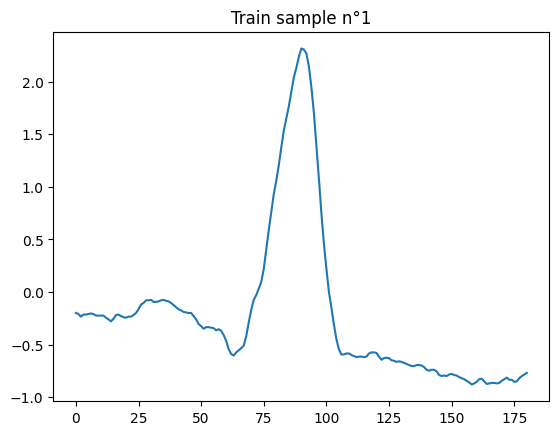

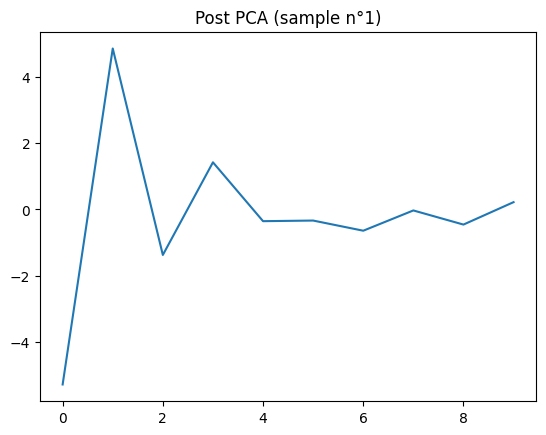

In [20]:
index_shown = 1

plt.plot(np.arange(0, train_X_signal.shape[1]), train_X_signal[index_shown])
plt.title(f"Train sample n°{index_shown}")
plt.show()

plt.plot(np.arange(0, train_X_PCA.shape[1]), train_X_PCA[index_shown])
plt.title(f"Post PCA (sample n°{index_shown})")
plt.show()

In [21]:
# Comptage des différentes classifications

def count_occurrences(arr):
    unique, counts = np.unique(arr, return_counts=True)
    return dict(zip(unique, counts))

count_occurrences(train_Y_temp)

{'A': 971, 'L': 995, 'N': 1038, 'R': 1029, 'V': 967}

# MLP 

In [ ]:
# Split train / test

X_train, X_val, Y_train, Y_val = train_test_split(train_X_signal, train_Y, test_size=0.2, random_state=42)

# np.save('data/X_train.npy', X_train)
# np.save('data/Y_train.npy', Y_train)
# np.save('data/X_val.npy', X_val)
# np.save('data/Y_val.npy', Y_val)

In [ ]:
# MLP Layers

input_layer = tf.keras.Input(shape=(X_train.shape[1],))
hidden1 = tf.keras.layers.Dense(64, activation='relu')(input_layer)
hidden2 = tf.keras.layers.Dense(64, activation='relu')(hidden1)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(hidden2)

model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer, name="MLP-cardIAc-V1")

model.summary()

Model: "MLP-cardIAc-V1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 181)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,133 (63.02 KB)

 Trainable params: 16,133 (63.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4660 - loss: 1.2607 - val_accuracy: 0.7660 - val_loss: 0.7339
Epoch 2/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.6626 - val_accuracy: 0.8510 - val_loss: 0.5033
Epoch 3/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8543 - loss: 0.4863 - val_accuracy: 0.8870 - val_loss: 0.4094
Epoch 4/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.3996 - val_accuracy: 0.9000 - val_loss: 0.3686
Epoch 5/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8909 - loss: 0.3586 - val_accuracy: 0.9070 - val_loss: 0.3210
Epoch 6/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9035 - loss: 0.3054 - val_accuracy: 0.9120 - val_loss: 0.3108
Epoch 7/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9087 - loss: 0.2872 - val_accuracy: 0.9250 - val_loss: 0.2659
Epoch 8/32
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9025 - loss: 0.2857 - val_accuracy: 0.9150 - val_loss:

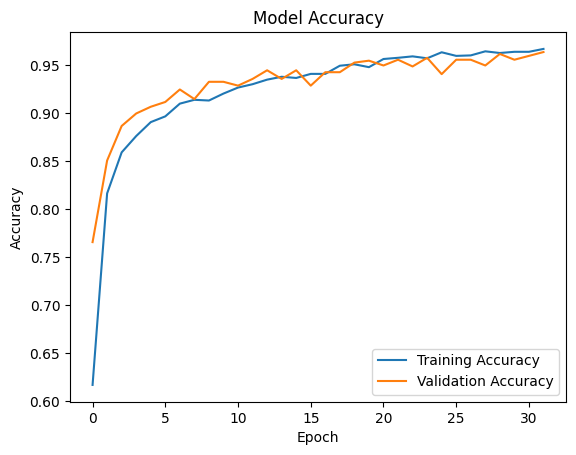

In [24]:
# Compile and train the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, 
    Y_train, 
    epochs=32, 
    batch_size=50, 
    validation_data=(X_val, Y_val)  # Use validation_data instead of validation_split
)

# Plot the accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
model.save("models/MLP_cardIAc.keras")

model = tf.keras.models.load_model('models/MLP_cardIAc.keras')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("models/MLP_cardIAc.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpa97hm4vc\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpa97hm4vc\assets


Saved artifact at 'C:\Users\Lenovo\AppData\Local\Temp\tmpa97hm4vc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 181), dtype=tf.float32, name='input_layer_2')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  1294777417552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1294769442256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1294777971344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1294777962128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1294777960592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1294777960976: TensorSpec(shape=(), dtype=tf.resource, name=None)


66644

In [26]:
# Save 